<h1 align="center" style="color: #fff; background-color: #000; padding: 10px; font-size: 36px;">The Flight Price Predictor</h1>

<u>Dataset</u> 
-------------

The data is taken from: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

<u>Objective</u>
-------------

The aim of this project is to predict Target or dependent variable, Ticket price based on the independent variables :-
>* Airline (airline)
>* Source and destination (source_city , destination_city)
>* Time of departure and arrival (departure_time , arrival_time)
>* Seat type (class)
>* Number days before days before the travel (days_left)



<h1 align="center"  style=" color:#fff; background-color:#969696; padding:10px;">Business Understanding  </h1>

The objective of the study is to analyse the flight booking dataset obtained and to conduct various statistical hypothesis tests in order to get meaningful information from it. Have you ever wondered why plane ticket prices seem to jump around at random? This is actually the product of a carefully calculated algorithm that airlines use to maximize their profits by balancing individual ticket pricing and the capacity of the plane. The price of a plane ticket is constantly changing based on current demand for a flight, the number of seats available, and the timing of booking. Our aim is to predict the price of the ticket fare.

<h1 align="center"  style=" color:#fff; background-color:#969696; padding:10px;">Data understanding </h1>


Dataset contains information about flight booking options between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset. .

## <u>Features</u>
The various features of the dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: The City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: The City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

#### Importing Libraries

In [1]:
# Import python libraries 

import pandas as pd #for data frame
import numpy as np  #for numeric calulation
import seaborn as sns #for Visualization
import matplotlib.pyplot as plt #for Visualization
%matplotlib inline

#### Data Import

In [2]:
# Import data 'Flight Price Prediction.csv' using panads.
# Data from the CSV file will be loaded into the 'flightdf' DataFrame

flightdf = pd.read_csv("Airline price Dataset.csv")
flightdf

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...
300156,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265.0
300157,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105.0
300158,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099.0
300159,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585.0


<h1 align="center"  style=" color:#fff; background-color:#969696; padding:10px;">Data Cleaning, Preparation and EDA </h1>

In [3]:
flightdf.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0


In [4]:
# display the column names 

flightdf.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
#list columns and feilds

list(flightdf)

['Unnamed: 0',
 'airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left',
 'price']

In [6]:
#display the number of rows and columns

flightdf.shape

(300161, 12)

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings: </b> The dataset contains 300153 rows and 12 columns </b> 
</div>

In [7]:
flightdf.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price               float64
dtype: object

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b> In the dataset, there are four numerical variables, one of which is the target variable 'price,' and the remaining are categorical variables </b>. 
</div>

#### Descriptive statistics of the numerical variables

In [8]:
# The describe() method in Pandas is used to generate descriptive statistics of a DataFrame or a specific column within a DataFrame, typically for numerical data.
# It provides summary statistics such as count, mean, standard deviation, minimum, maximum, and quartiles for each column.

flightdf.describe()

,Unnamed: 0,duration,days_left,price
count,300161.000000,300161.000000,300161.000000,300153.000000
mean,150072.001293,12.221019,26.004084,20889.660523
std,86649.159174,7.192038,13.561437,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75032.000000,6.830000,15.000000,4783.000000
50%,150072.000000,11.250000,26.000000,7425.000000
75%,225112.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b> The minimum price of a flight ticket is 1105 when compared with the maximum fare 123071 </b>. 
</div>

In [9]:
#drop a column labeled 'Unnamed: 0'( which got created automaticaly due to no label) from a DataFrame called dataset using the drop method. 
#The axis=1 parameter specifies that you want to drop a column, #axis=0 is for rows
#and inplace=True means that you want to modify the dataset DataFrame in place.

flightdf.drop('Unnamed: 0', axis = 1, inplace= True)


In [10]:
flightdf.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0


#### Examining the unique values in each column

In [11]:
#to print the column name and count of unique values in each column
for col in list(flightdf.columns):
    print("\nfor column : ", col,"\n")
    print(flightdf[col].value_counts())


for column :  airline 

Vistara      127867
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

for column :  flight 

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

for column :  source_city 

Delhi        61351
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

for column :  departure_time 

Morning          71150
Early_Morning    66790
Evening          65104
Night            48015
Afternoon        47796
Late_Night        1306
Name: departure_time, dtype: int64

for column :  stops 

one            250869
zero            36006
two_or_more     13286
Name: stops, dtype: int64

for column :  arrival_time 

Night            91540
Evening          78323
Morning        

In [12]:
flightdf.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               8
dtype: int64

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b> Due to the presence of just 8 missing values in the target variable "price," we will proceed by eliminating these specific rows from the dataset. This decision is based on the small number of missing values, making their removal a reasonable choice.  </b>. 
</div>

In [13]:
flightdf.dropna(subset=['price'], inplace=True)

In [14]:
# code is using NumPy's np.where function to update values in the 'airline' column of the DataFrame dataset. 
# Specifically, it's checking if the value in the 'airline' column is equal to 'GO_FIRST', and 
# if so, it replaces it with 'Go_First'. Otherwise, it leaves the value unchanged.

flightdf['airline']=np.where(flightdf['airline']=='GO_FIRST','Go_First', flightdf['airline'])

## EDA by means of data visualization 

### We are going to analyze the below questions by means of Data Visualization :-

>* How does the ticket price varies with the type of airline?
>* How does the ticket price affected when tickets are bought in 1 or 2 days before departure?
>* How does the ticket price change based on the Departure Time and Arrival Time?
>* How does the ticket price changes with change in Source city and Destination city?
>* How does the ticket price vary with the number of stops of a Flight?

#### Q1- How does the ticket price varies with the type of airline?

Text(0.5, 1.0, 'Airline prices based on companies for business tickets')

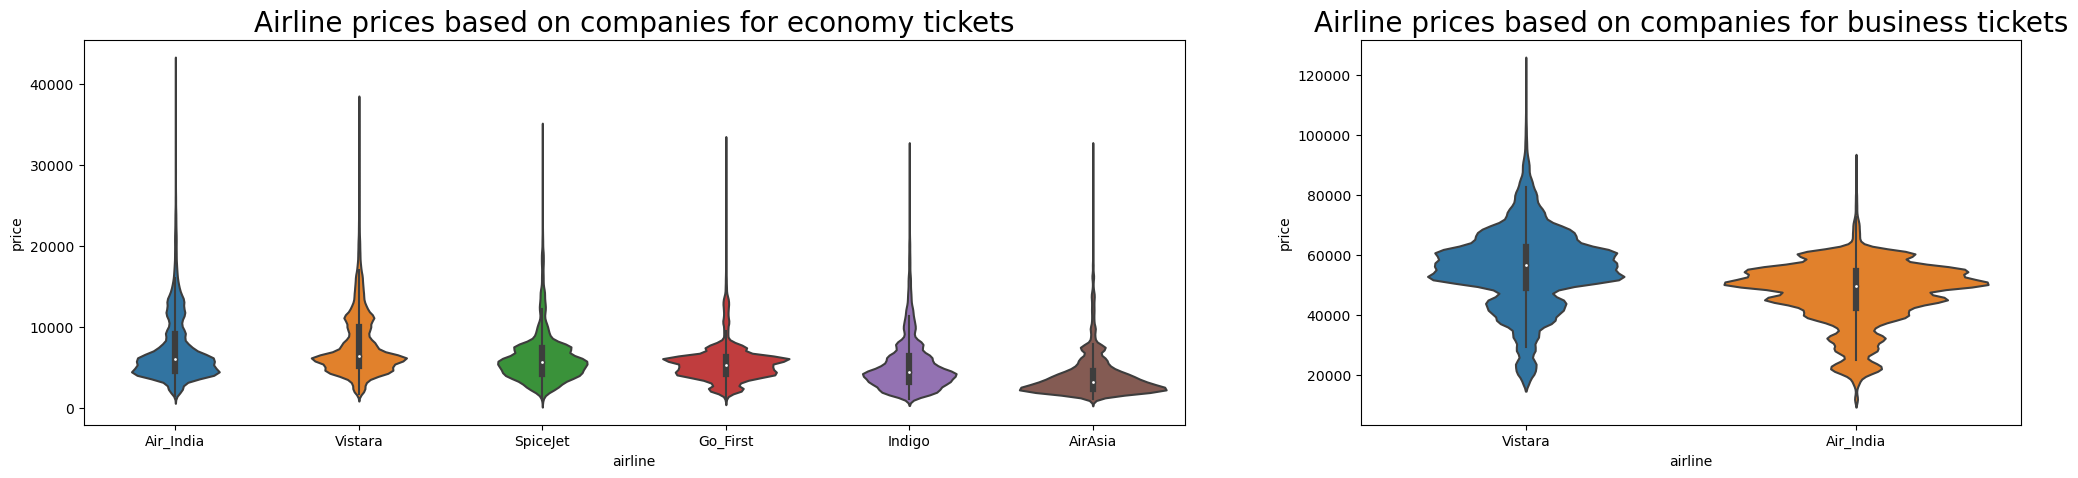

In [15]:
#For comparing the prices between the companies 
#the class has a big impact on the final price.
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.violinplot(y = "price", x = "airline",data = flightdf.loc[flightdf["class"]=='Economy'].sort_values("price", ascending = False), kind="boxen", ax=axs[0])
axs[0].set_title("Airline prices based on companies for economy tickets",fontsize=20)
sns.violinplot(y = "price", x = "airline",data = flightdf.loc[flightdf["class"]=='Business'].sort_values("price", ascending = False), kind="boxen", ax=axs[1])
axs[1].set_title("Airline prices based on companies for business tickets",fontsize=20)

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b>
    Among the airlines, Air India and Vistara is having the most expensive flight tickets, whereas AirAsia provides the most affordable fares. Specifically, in the context of business class, Vistara's prices are the highest in comparison to AirAsia. </b>. 
</div>

#### Q2- How does the ticket price affected when tickets are bought in 1 or 2 days before departure?

<Axes: xlabel='days_left', ylabel='price'>

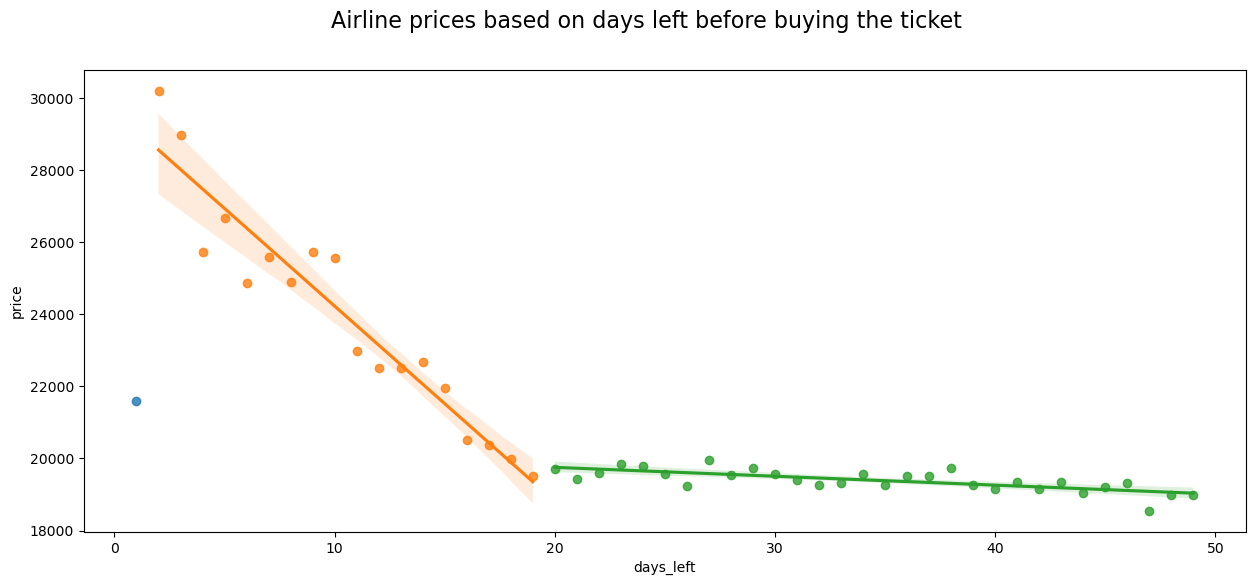

In [16]:
flightdf_temp = flightdf.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(15,6)).suptitle('Airline prices based on days left before buying the ticket', fontsize=16)
ax = plt.axes()
sns.regplot(x=flightdf_temp.loc[flightdf_temp["days_left"]==1].days_left, y=flightdf_temp.loc[flightdf_temp["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=flightdf_temp.loc[(flightdf_temp["days_left"]>1)&(flightdf_temp["days_left"]<20)].days_left, y=flightdf_temp.loc[(flightdf_temp["days_left"]>1)&(flightdf_temp["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=flightdf_temp.loc[flightdf_temp["days_left"]>=20].days_left, y=flightdf_temp.loc[flightdf_temp["days_left"]>=20].price, fit_reg=True, ax=ax)


<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b>
The graph illustrates a gradual increase in prices until 20 days before the flight, followed by a significant drop just one day prior, resulting in prices up to three times cheaper. This pattern suggests that airlines may reduce ticket prices close to the departure date to fill empty seats and ensure high occupancy on their planes</b>. 
</div>

#### Q3- How does the ticket price change based on the Departure Time and Arrival Time?

Text(0.5, 1.0, 'Airline prices based on the arrival time')

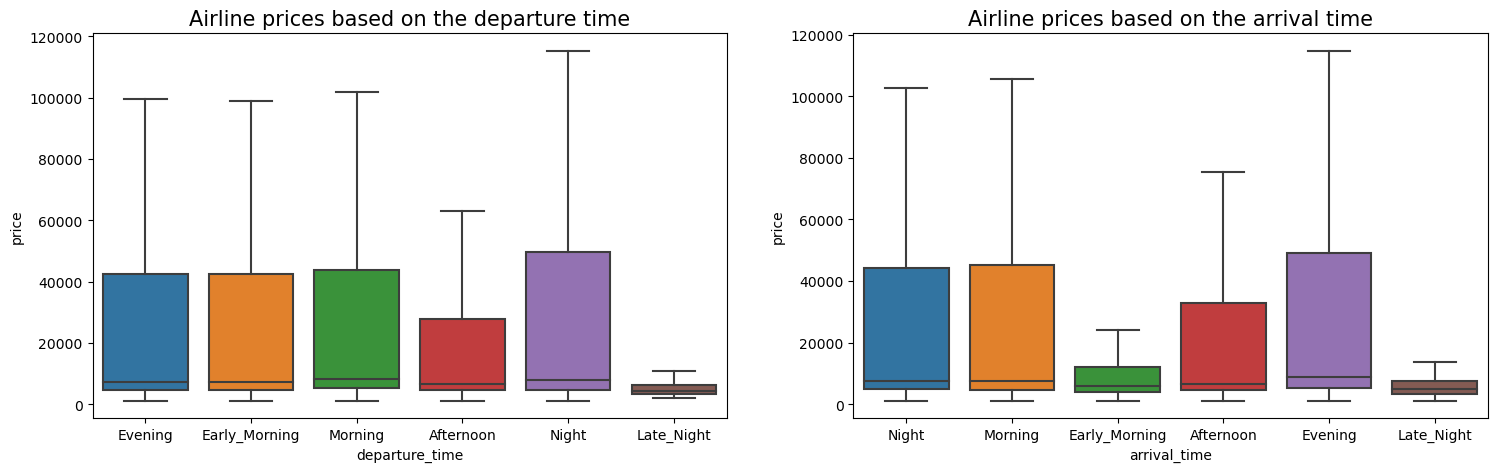

In [17]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=flightdf, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=flightdf, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b>
    The box plot indicates that traveling during late night hours, both departing and arriving, is the most cost-effective option. Additionally, it's apparent that early morning flights are also budget-friendly, while afternoon flights come at a slightly lower cost compared to evening, morning, and night flights </b>. 
</div>

#### Q4- How does the ticket price changes with change in Source city and Destination city?

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

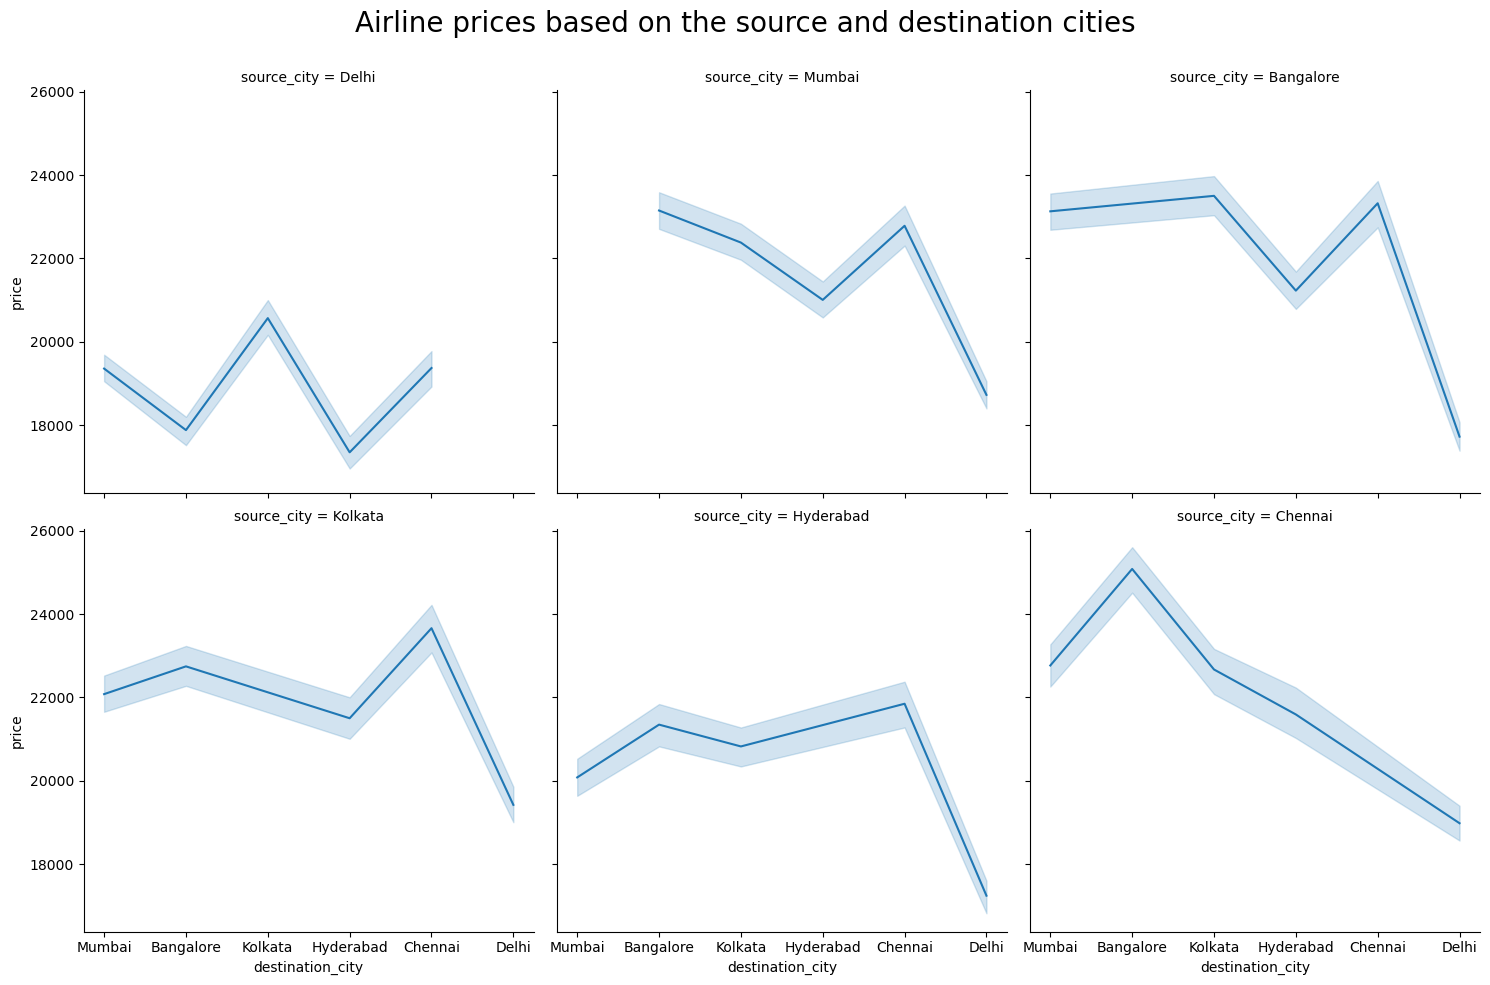

In [18]:
#visualize the different prices for all the destinations as a departure and arrival destination.
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=flightdf, col_wrap=3)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ax.fig.suptitle('Airline prices based on the source and destination cities',fontsize=20)

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b>
    From this graph,it implies that flight leaving and arriving at Delhi are often cheaper whereas flights leaving and arriving at Bangalore are the high priced.
    </b>. 
</div>

#### Q5- How does the ticket price vary with the number of stops of a Flight?

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

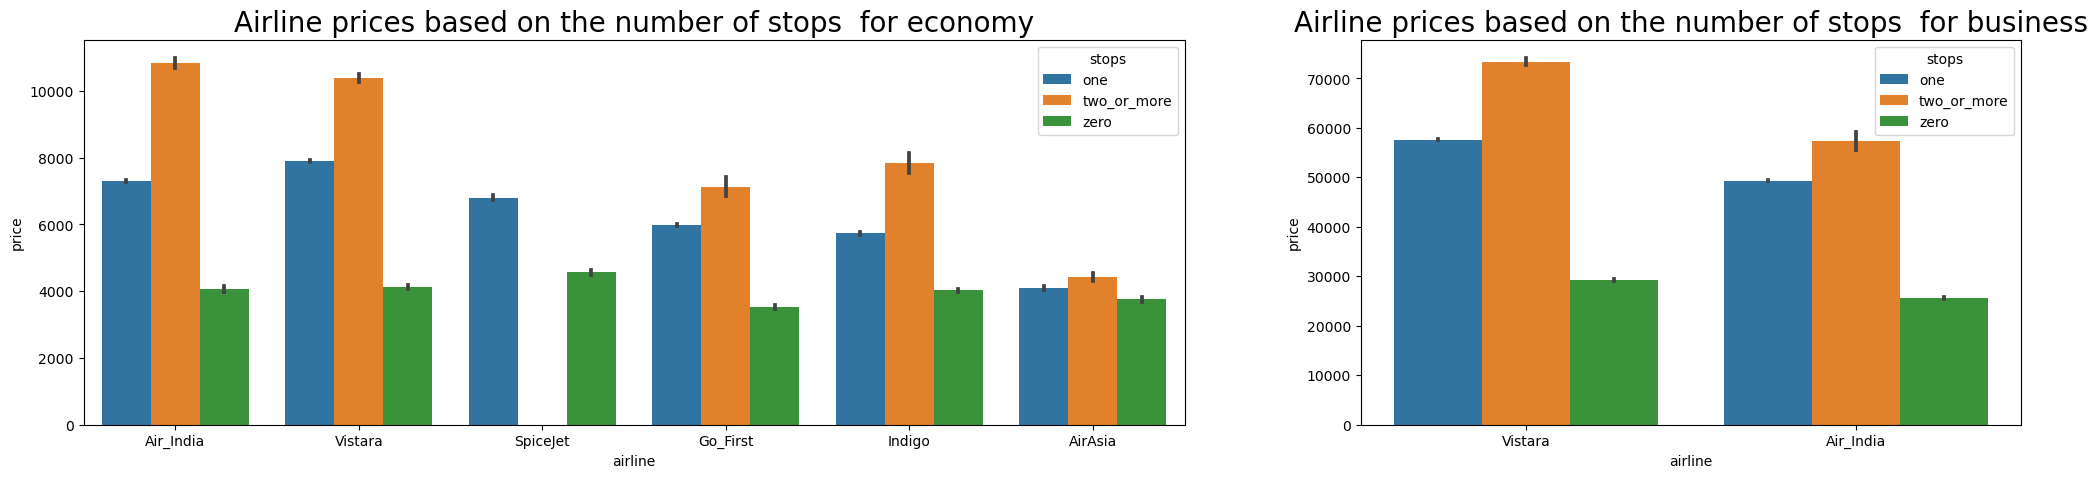

In [19]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = flightdf.loc[flightdf["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = flightdf.loc[flightdf["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b>
Clearly, the flight cost tends to increase with more stops, but AirAsia appears to be an exception with relatively stable prices. The unique behavior and analysis of AirAsia suggest that it operates as a low-cost airline company.
    </b> 
</div>

### Checking the skewness and normality of the data. 

In [20]:
flightdf.skew()

C:\Users\Prijin CBU\AppData\Local\Temp\ipykernel_23648\3432922555.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  flightdf.skew()


duration     0.602899
days_left   -0.035464
price        1.061377
dtype: float64

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b>
The above skewness values provide insights into the shape of the data distributions:
'duration' and 'price' exhibit right-skewed or positive skewed distributions, with longer tails on the right and data concentrated on the left.
'days_Left' has a skewness value close to zero, indicating a nearly symmetric distribution, which means the data is relatively balanced without strong skewness in either direction.
    </b> 
</div>


In [21]:
flightdf.kurtosis()

C:\Users\Prijin CBU\AppData\Local\Temp\ipykernel_23648\1051989738.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  flightdf.kurtosis()


duration    -0.268996
days_left   -1.156215
price       -0.396293
dtype: float64

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b>
The above kurtosis values shows that the data distributions for the three variables, namely Duration, Days Left, and Price, are characterized by negative kurtosis values, indicating platykurtic shapes. This means that these distributions have lighter tails and are less peaked compared to a standard normal distribution. Consequently, there is a reduced probability of extreme values or outliers, and the data tends to be more evenly distributed around the mean.
    </b> 
</div>

### Visualizations of numeric features with boxplot and histogram to check the outliers and skewness. 

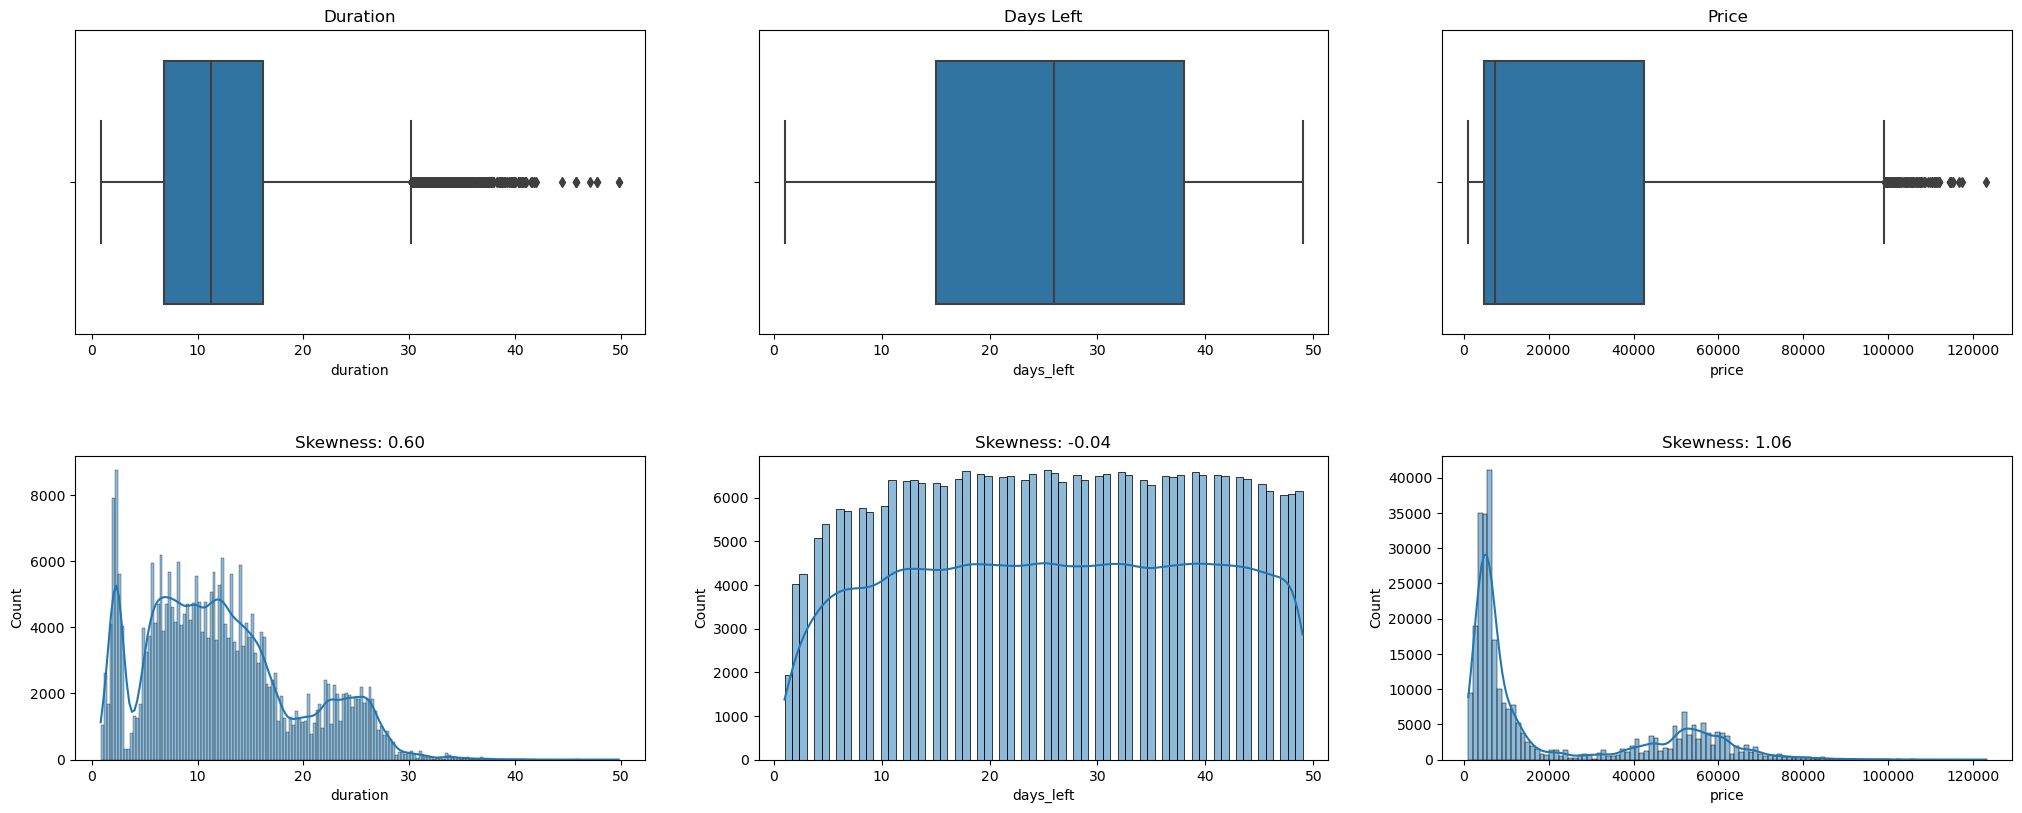

In [22]:

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Create a figure with subplots
plt.figure(figsize=(25, 15))

# Create a grid for subplots
grid = plt.GridSpec(3, 3, hspace=0.4)

# Subplot 1: Box Plot and Skewness Plot for Duration
plt.subplot(grid[0, 0])
sns.boxplot(x=flightdf["duration"], data=flightdf)
plt.title("Duration")

plt.subplot(grid[1, 0])
sns.histplot(flightdf["duration"], kde=True)
plt.title("Skewness: {:.2f}".format(flightdf["duration"].skew()))

# Subplot 2: Box Plot and Skewness Plot for Days Left
plt.subplot(grid[0, 1])
sns.boxplot(x=flightdf["days_left"], data=flightdf)
plt.title("Days Left")

plt.subplot(grid[1, 1])
sns.histplot(flightdf["days_left"], kde=True)
plt.title("Skewness: {:.2f}".format(flightdf["days_left"].skew()))

# Subplot 3: Box Plot and Skewness Plot for Price
plt.subplot(grid[0, 2])
sns.boxplot(x=flightdf["price"], data=flightdf)
plt.title("Price")

plt.subplot(grid[1, 2])
sns.histplot(flightdf["price"], kde=True)
plt.title("Skewness: {:.2f}".format(flightdf["price"].skew()))

plt.show()


<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b> Based on the plot shown above, it's evident that target variable 'price' exhibits a positive skew, primarily driven by the 'Business' class on top of that, we're retaining the outlier values in the  target variable, 'price', because they are primarily influenced by the 'class' feature, where business class prices are notably higher than economy class prices. The skewness in duration is primarily affected by the number of stops, which includes 'zero,' 'one,' and 'two_or_more.'
 </b>. 
</div>

### Shapiro-Wilk Test (Statistical Normality Test)
* We will now check the normality using Shapiro-Wilk Test which is a statistical normality test 
* The Shapiro-Wilk test is a widely used test for checking the normality of a dataset.
* It calculates a test statistic that assesses the degree of departure from normality, and you compare it to a critical value.
* A significant p-value (typically below 0.05,p<0.05) indicates that the data significantly deviates from normality.

In [23]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

seed(1) #This line sets a seed for the random number generator to ensure reproducibility. The seed value '1' is chosen here.

#This line calls the shapiro function to perform the Shapiro-Wilk test on the 'price' column of the 'flightdf' DataFrame. The test results, including the test statistic and p-value, are assigned to the variables stat and p, respectively.
stat, p = shapiro(flightdf['price'])

print('Statistics=%.3f, p=%.3f' % (stat, p)) #This line prints the test statistics and p-value with three decimal places. The 'Statistics' variable will show the test statistic, and 'p' represents the p-value.

alpha = 0.05

if p < alpha:
    print("The data does not follow a normal distribution (reject the null hypothesis).")
else:
    print("The data follows a normal distribution (fail to reject the null hypothesis).")

Statistics=0.752, p=0.000
The data does not follow a normal distribution (reject the null hypothesis).


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


 <h1 align="center"  style=" color:#fff; background-color:#969696; padding:10px;">Data Transformation</h1>


#### We are using Label encoding to transform Categorical variables into numerical values.

In [24]:
# code  provided is correctly applying label encoding to multiple categorical columns in the DataFrame flightdf
# The process involves the use of a Label Encoding.

from sklearn.preprocessing import LabelEncoder #import the LabelEncoder class from the sklearn.preprocessing module. This class is used to encode categorical labels into numerical values.

le = LabelEncoder()

cat_cols = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# Copy the DataFrame
flightdf_orginal = flightdf.copy()

# Apply label encoding to the specified columns
flightdf[cat_cols] = flightdf[cat_cols].apply(le.fit_transform)


# Display unique encoded values for each categorical column for Data Preprocessing in the Model deployment stage.
for column in cat_cols:
    unique_encoded_values = flightdf[column].unique()   
    print(f"Unique encoded values for column '{column}' {flightdf_orginal[column].unique()} : {unique_encoded_values}")


Unique encoded values for column 'airline' ['SpiceJet' 'AirAsia' 'Vistara' 'Go_First' 'Indigo' 'Air_India'] : [4 0 5 2 3 1]
Unique encoded values for column 'flight' ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433'] : [1408 1387 1213 ...  558  587  718]
Unique encoded values for column 'source_city' ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai'] : [2 5 0 4 3 1]
Unique encoded values for column 'departure_time' ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night'] : [2 1 4 0 5 3]
Unique encoded values for column 'stops' ['zero' 'one' 'two_or_more'] : [2 0 1]
Unique encoded values for column 'arrival_time' ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night'] : [5 4 1 0 2 3]
Unique encoded values for column 'destination_city' ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi'] : [5 0 4 3 1 2]
Unique encoded values for column 'class' ['Economy' 'Business'] : [1 0]


In [25]:
flightdf

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953.0
1,4,1387,2,1,2,4,5,1,2.33,1,5953.0
2,0,1213,2,1,2,1,5,1,2.17,1,5956.0
3,5,1559,2,4,2,0,5,1,2.25,1,5955.0
4,5,1549,2,4,2,4,5,1,2.33,1,5955.0
...,...,...,...,...,...,...,...,...,...,...,...
300156,5,1477,1,4,0,2,3,0,10.08,49,69265.0
300157,5,1481,1,0,0,5,3,0,10.42,49,77105.0
300158,5,1486,1,1,0,5,3,0,13.83,49,79099.0
300159,5,1483,1,1,0,2,3,0,10.00,49,81585.0


In [26]:
flightdf.dtypes

airline               int32
flight                int32
source_city           int32
departure_time        int32
stops                 int32
arrival_time          int32
destination_city      int32
class                 int32
duration            float64
days_left             int64
price               float64
dtype: object

<h1 align="center"  style=" color:#fff; background-color:#969696; padding:10px;">Feature selection </h1>

### Using Correlation 

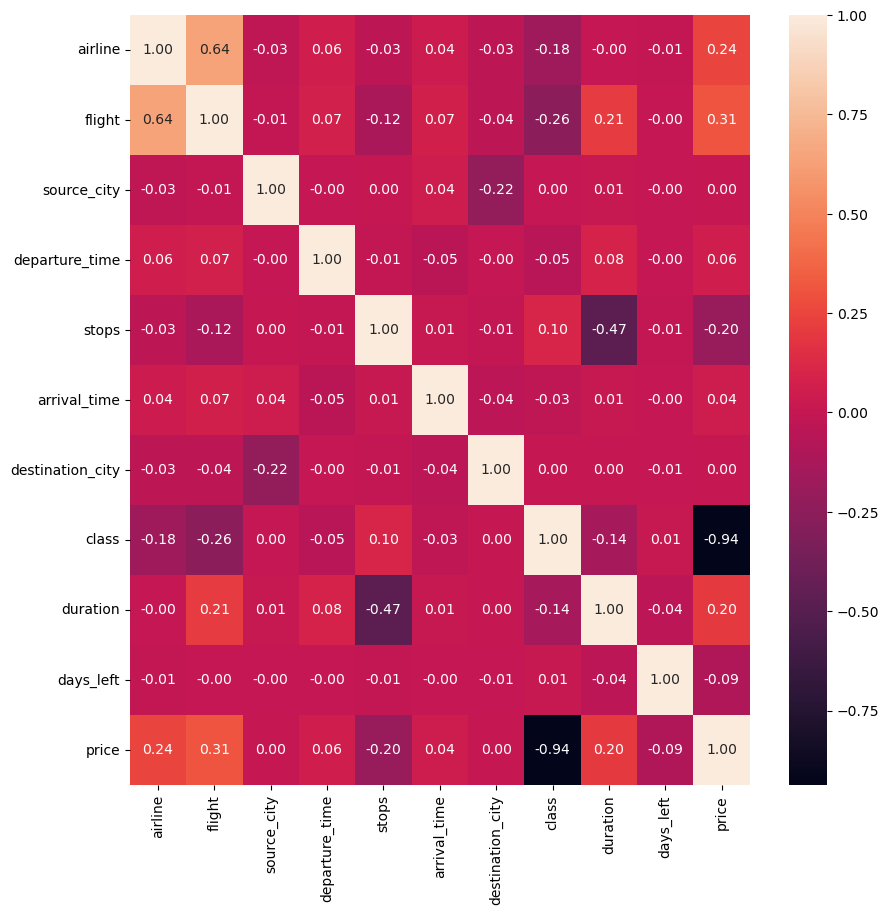

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(flightdf.corr(), annot = True, fmt=".2f")
plt.show()

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b>
    <b>
Based on the heatmap above, it's evident that there is a strong correlation between the 'flight' and 'airline' variables. In many cases, it's beneficial to remove highly correlated independent variables from your dataset when building a machine learning model. These highly correlated features, often referred to as multicollinearity, can introduce challenges in model training and interpretation. As a result, we've decided to drop the 'flight' column from our dataset.


While 'airline' has a slightly lower correlation with the target variable 'price,' we've still chosen to eliminate 'flight' to simplify the input data for the model implementaion.

Furthermore, it's worth noting that the independent variables 'source_city' and 'destination_city' exhibit zero correlation with the target variable 'Price.' However, we've retained them in our dataset to explore the usability of other feature selection methods.</b> 
</div>

In [28]:
flightdf.drop('flight', axis = 1, inplace= True)

### Using Filter-based method : Univarite Selection using Statistical test F-statistic (ANOVA)

Since we have mostly categorical Input variable and continuous Target variable, we are using ANOVA and selected the 6 most important features

In [29]:
# To perform feature selection with the F-statistic (ANOVA) method, we will use the `f_regression` function from scikit-learn. 

from sklearn.feature_selection import SelectKBest, f_regression

# Split the dataset into features (X) and the target variable (Y)
Y = flightdf["price"]
X = flightdf.drop(["price"], axis=1)

# Feature selection using F-statistic (ANOVA)
num_features_to_select = 6  # Number of features to select
selected_features = SelectKBest(f_regression, k=num_features_to_select).fit(X, Y)

# Get the indices of the selected features
selected_feature_indices = selected_features.get_support(indices=True)

# Display the selected features and their indices
selected_feature_names = X.columns[selected_feature_indices]
print("Selected features:", selected_feature_names)

# Selected features' data
selected_data = X[selected_feature_names]
print(selected_data.head())



Selected features: Index(['airline', 'departure_time', 'stops', 'class', 'duration', 'days_left'], dtype='object')
   airline  departure_time  stops  class  duration  days_left
0        4               2      2      1      2.17          1
1        4               1      2      1      2.33          1
2        0               1      2      1      2.17          1
3        5               4      2      1      2.25          1
4        5               4      2      1      2.33          1


<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b>
    By employing a filter-based selection method, we successfully identified the six most important features through F-statistic (ANOVA) analysis. These features are 'airline,' 'departure_time,' 'stops,' 'class,' 'duration,' and 'days_left.' Next, we will drop the unselected features from our dataframe.<b>
</b> 
</div>

In [30]:
# Droping the unselected features 
features_to_drop = [col for col in flightdf.columns if col not in selected_feature_names and col != 'price']
flightdf.drop(features_to_drop, axis=1, inplace=True)
flightdf

,airline,departure_time,stops,class,duration,days_left,price
0,4,2,2,1,2.17,1,5953.0
1,4,1,2,1,2.33,1,5953.0
2,0,1,2,1,2.17,1,5956.0
3,5,4,2,1,2.25,1,5955.0
4,5,4,2,1,2.33,1,5955.0
...,...,...,...,...,...,...,...
300156,5,4,0,0,10.08,49,69265.0
300157,5,0,0,0,10.42,49,77105.0
300158,5,1,0,0,13.83,49,79099.0
300159,5,1,0,0,10.00,49,81585.0


### Using Wrapper-Based method : Backward Elimination 

In [31]:
import statsmodels.api as sm
Y = flightdf["price"]
X = flightdf.drop(["price"], axis=1)
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(Y,X_1).fit()
# model.pvalues

In [32]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['airline', 'departure_time', 'stops', 'class', 'duration', 'days_left']


<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b>
    The backward elimination method, which is a wrapper-based feature selection technique, reached a point where it no longer eliminated any more features<b>
</b> 
</div>

## Scaling of variables: MIN-MAX Normalization

In [33]:

#The fit_transform method of the MinMaxScaler scales the data within the specified range (0 to 1 by default) for each of the selected columns.

from sklearn.preprocessing import MinMaxScaler

# Custom new minimum and maximum values
new_min = 0
new_max = 1  # Set your desired maximum value

duration_min = flightdf['duration'].min()
duration_max = flightdf['duration'].max()
days_left_min = flightdf['days_left'].min()
days_left_max = flightdf['days_left'].max()
price_min = flightdf['price'].min()
price_max = flightdf['price'].max()
#above are for later use. 



### Scaling all the variables including the categorical

In [34]:
#Scaling all the varaibles including the categorical ones. 

# Create the MinMaxScaler with all the  feature_range 
#scaler = MinMaxScaler(feature_range=(new_min, new_max))

#scale_cols = ['airline', 'departure_time', 'stops', 'class', 'duration', 'days_left','price']

 # Apply min-max scaling to the specified columns in flightdf
#flightdf[scale_cols] = scaler.fit_transform(flightdf[scale_cols])

 # Display the scaled DataFrame
#flightdf


### Numerical Variable Scaling

In [35]:
 # Create the MinMaxScaler with custom feature_range(numerical only)
scaler = MinMaxScaler(feature_range=(new_min, new_max))

 # List of numerical columns to scale
num_cols = ['duration', 'days_left', 'price']

 # Apply min-max scaling to the specified columns in flightdf
flightdf[num_cols] = scaler.fit_transform(flightdf[num_cols])

 # Display the scaled DataFrame
flightdf

,airline,departure_time,stops,class,duration,days_left,price
0,4,2,2,1,0.027347,0.0,0.039749
1,4,1,2,1,0.030612,0.0,0.039749
2,0,1,2,1,0.027347,0.0,0.039773
3,5,4,2,1,0.028980,0.0,0.039765
4,5,4,2,1,0.030612,0.0,0.039765
...,...,...,...,...,...,...,...
300156,5,4,0,0,0.188776,1.0,0.558844
300157,5,0,0,0,0.195714,1.0,0.623124
300158,5,1,0,0,0.265306,1.0,0.639473
300159,5,1,0,0,0.187143,1.0,0.659856


<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b> Scaling the categorical variables does not lead to any noticeable improvement in model accuracy; therefore, only the numerical variables are being scaled</b>. 
</div>


<h1 align="center"  style=" color:#fff; background-color:#969696; padding:10px;">Modeling </h1>

#### Splitting of input and target variables

In [36]:
Y = flightdf["price"]
X = flightdf.drop(["price"], axis=1)

#### Splitting dataset for modeling

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 7)

### Model 1 - Linear Regression

In [38]:
# model building
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()

lrm.fit(X_train,Y_train) #training the algorithm

Y_pred = lrm.predict(X_test)

In [39]:
#To retrieve the intercept:
print(lrm.intercept_)

#For retrieving the slope:
print(lrm.coef_)

0.4149909547041518
[ 7.78656775e-03  1.66401669e-04 -2.67437825e-02 -3.65345560e-01
  3.75307173e-02 -5.16874714e-02]


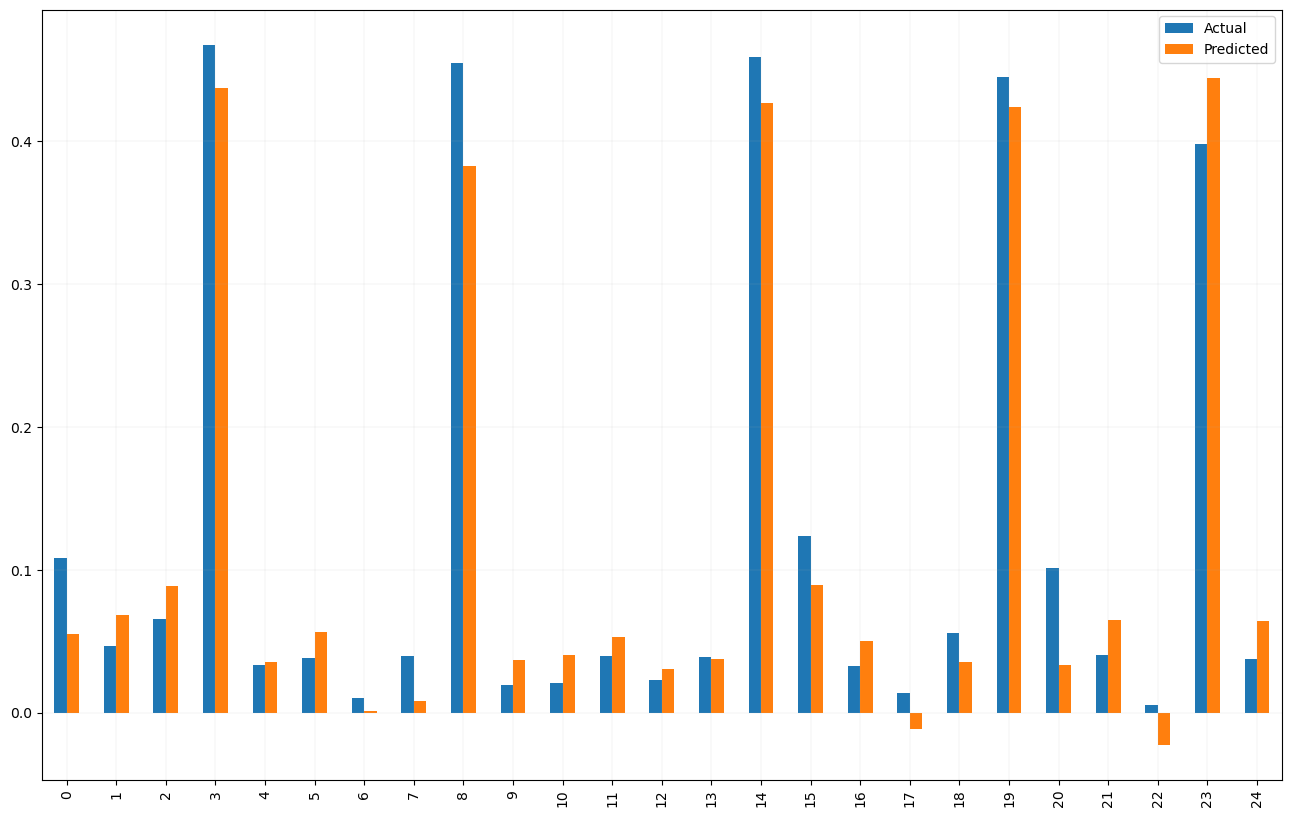

In [40]:
df_lrm = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': Y_pred.flatten()})


df1 = df_lrm.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()


In [41]:
#to determine how well a regression model makes predictions.

from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score

# MSE

MSE_LR=mean_squared_error(Y_test, Y_pred)
print("MSE: ", mean_squared_error(Y_test, Y_pred))

# RMSE

RMSE_LR=np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y_pred)))

# MAE

MAE_LR=np.sqrt(mean_absolute_error(Y_test, Y_pred))
print("MAE: ", np.sqrt(mean_absolute_error(Y_test, Y_pred)))
      
# R2 Score
               
R2_LR=r2_score(Y_test, Y_pred)
print("R2 Score: ", r2_score(Y_test, Y_pred))

MSE:  0.003369531482254139
RMSE:  0.05804766560555333
MAE:  0.1955350223323693
R2 Score:  0.9030651082662823



### Model 2 - Decision Tree Regressor



In [42]:
from sklearn import datasets

from sklearn.tree import DecisionTreeRegressor    # Import decision tree regression model

Rtree = DecisionTreeRegressor(criterion='friedman_mse',     # Initialize and fit regressor,The criterion parameter specifies the function that the decision tree algorithm will use to measure the quality of a split during the tree-building process. In this case, 'mse' stands for Mean Squared Error, which is a common criterion for regression problems. It measures the average squared difference between the actual target values and the predicted values. The decision tree algorithm tries to minimize this error when splitting the data.
                             max_depth=3)          #max_depth=3: The max_depth parameter defines the maximum depth of the decision tree. It limits the number of levels (or layers) in the tree. A smaller value, like 3, means that the tree will be relatively shallow, which can help prevent overfitting. Overfitting occurs when a model captures noise in the training data, making it perform poorly on new, unseen data. Setting max_depth can control the complexity of the tree.       

RT_model = Rtree.fit(X_train, Y_train)

Y_pred = RT_model.predict(X_test)

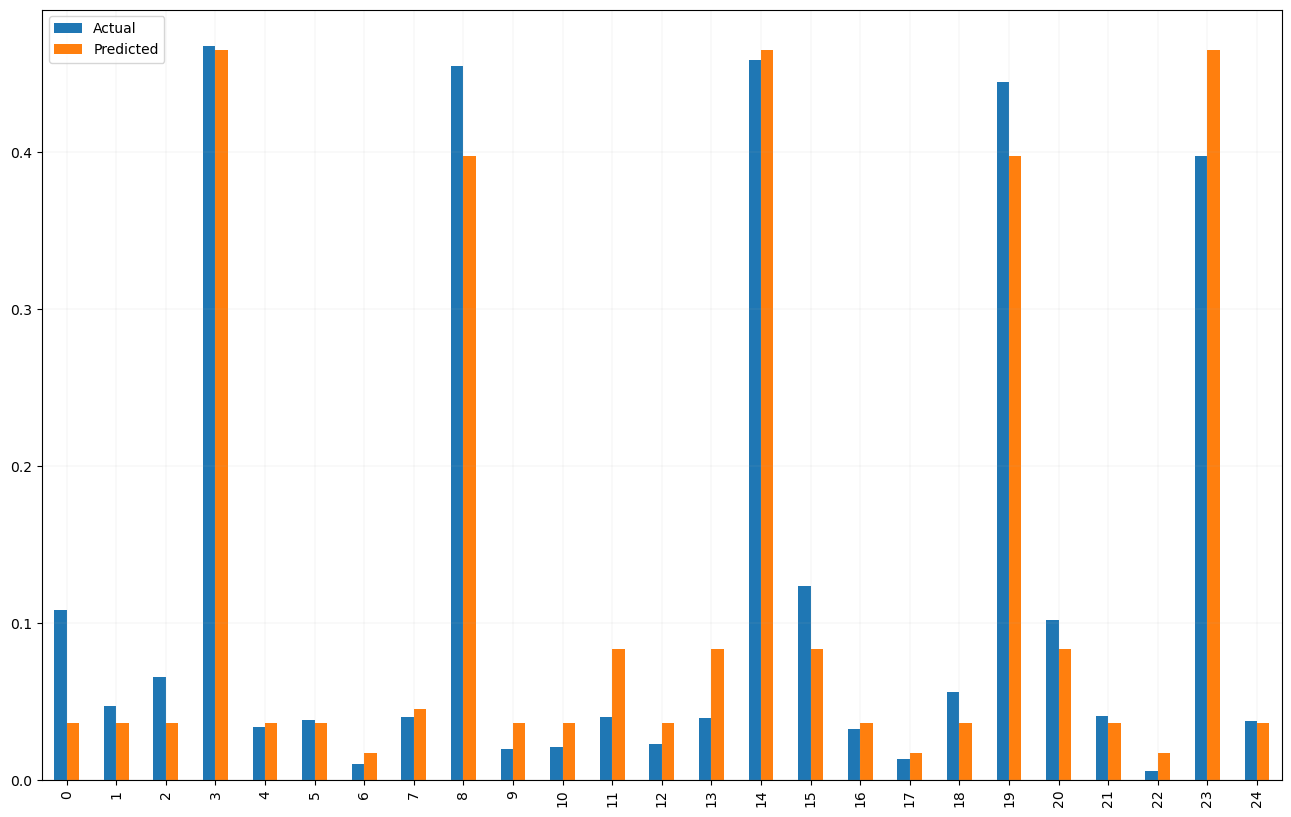

In [43]:
df_RT = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': Y_pred.flatten()})

df1 = df_RT.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score

# MSE

MSE_DTR=mean_squared_error(Y_test, Y_pred)
print("MSE: ", mean_squared_error(Y_test, Y_pred))

# RMSE

RMSE_DTR=np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y_pred)))

# MAE

MAE_DTR=np.sqrt(mean_absolute_error(Y_test, Y_pred))
print("MAE: ", np.sqrt(mean_absolute_error(Y_test, Y_pred)))
      
# R2 Score
               
R2_DTR=r2_score(Y_test, Y_pred)
print("R2 Score: ", r2_score(Y_test, Y_pred))

MSE:  0.0023279983286499375
RMSE:  0.04824933500733391
MAE:  0.17036578330322488
R2 Score:  0.9330279989569965


### Model 3 - Random Forest Regressor

In [45]:
 #creating object for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor(n_estimators= 50, random_state= 0) 
rfr.fit(X_train,Y_train) 
Y_pred = rfr.predict(X_test)

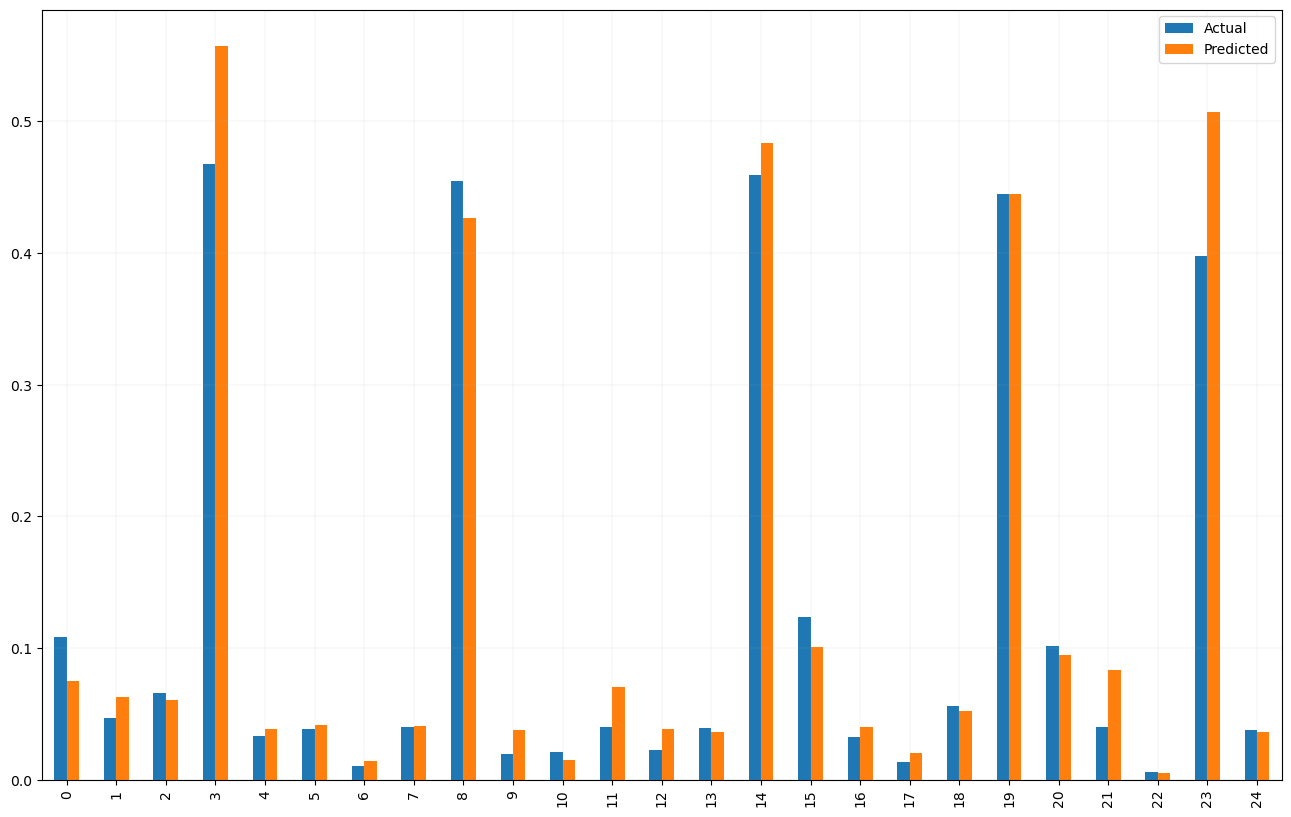

In [46]:
df_rfr = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': Y_pred.flatten()})



df1 = df_rfr.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()


In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score

# MSE

MSE_RFR=mean_squared_error(Y_test, Y_pred)
print("MSE: ", mean_squared_error(Y_test, Y_pred))

# RMSE

RMSE_RFR=np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y_pred)))

# MAE

MAE_RFR=np.sqrt(mean_absolute_error(Y_test, Y_pred))
print("MAE: ", np.sqrt(mean_absolute_error(Y_test, Y_pred)))
      
# R2 Score
               
R2_RFR=r2_score(Y_test, Y_pred)
print("R2 Score: ", r2_score(Y_test, Y_pred))
               

MSE:  0.0017920801975163153
RMSE:  0.04233296821056037
MAE:  0.148926740469656
R2 Score:  0.9484453251618911


### Model 4 XGBRegressor

In [48]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [49]:
import xgboost
from xgboost import XGBRegressor

# Create an XGBRegressor model
XGB = XGBRegressor(n_estimators=100, learning_rate=0.1)
XGB.fit(X_train,Y_train)
Y_pred = XGB.predict(X_test)

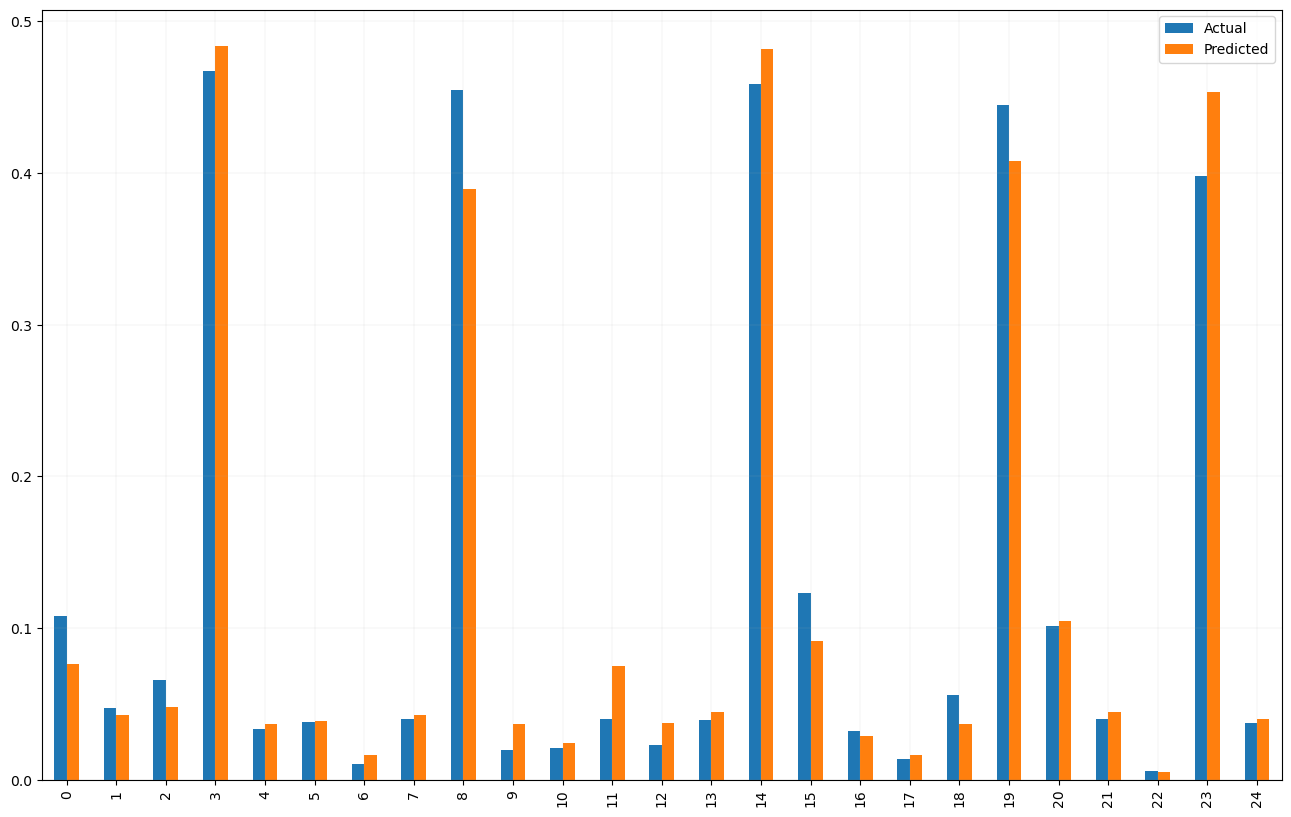

In [50]:
df_xgb = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': Y_pred.flatten()})
df1 = df_xgb.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()

In [51]:
# MSE

MSE_XGB=mean_squared_error(Y_test, Y_pred)
print("MSE: ", mean_squared_error(Y_test, Y_pred))

# RMSE

RMSE_XGB=np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y_pred)))

# MAE

MAE_XGB=np.sqrt(mean_absolute_error(Y_test, Y_pred))
print("MAE: ", np.sqrt(mean_absolute_error(Y_test, Y_pred)))
      
# R2 Score
               
R2_XGB=r2_score(Y_test, Y_pred)
print("R2 Score: ", r2_score(Y_test, Y_pred))
               

MSE:  0.0016501729357686007
RMSE:  0.040622320659565975
MAE:  0.15325668372703985
R2 Score:  0.9525277221141643


<h1 align="center"  style=" color:#fff; background-color:#969696; padding: 8px;">Model Evaluation</h1>

In [52]:

# Define the models and their results
models = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor","XGBRegressor"]
MSE = [MSE_LR, MSE_DTR, MSE_RFR,MSE_XGB]
RMSE = [RMSE_LR, RMSE_DTR, RMSE_RFR,RMSE_XGB]
MAE = [MAE_LR, MAE_DTR, MAE_RFR,MAE_XGB]
R2 = [R2_LR, R2_DTR, R2_RFR,R2_XGB]

# Create a DataFrame to display the results with indexing starting from 1 and labeled as 'Model no.'
results = pd.DataFrame({
    'Model': models,
    'MSE': MSE,
    'RMSE': RMSE,
    'MAE': MAE,
    'R Squared': R2
}, index=range(1, len(models) + 1))  # Start indexing from 1

# Rename the index column to 'Model no.'
results.index.name = 'Model no.'

# Function to highlight minimum MSE, RMSE, MAE, and maximum R-squared values and make the font bold
def highlight_min_max(val):
    style = ''
    if isinstance(val, (int, float)):
        if val == results['MSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['RMSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['MAE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['R Squared'].max():
            style += 'background-color: rgba(0, 0, 128, 0.3); color: white; font-weight: bold;'
    return style

# Apply the highlight_min_max function to the entire DataFrame
styled_results = results.style.applymap(highlight_min_max)

# Display the styled results DataFrame
styled_results


,Model,MSE,RMSE,MAE,R Squared
Model no.,,,,,
1,Linear Regression,0.003370,0.058048,0.195535,0.903065
2,Decision Tree Regressor,0.002328,0.048249,0.170366,0.933028
3,Random Forest Regressor,0.001792,0.042333,0.148927,0.948445
4,XGBRegressor,0.001650,0.040622,0.153257,0.952528


<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b>
    The table presents an assessment of four distinct regression models, each evaluated based on various performance metrics. To identify the most effective model among them, we can analyze the metrics as follows:

Linear Regression: This model demonstrates an MSE of 0.003370, RMSE of 0.058048, MAE of 0.195535, and an R-squared value of 0.903065.

Decision Tree Regressor: The Decision Tree model achieves an MSE of 0.002328, RMSE of 0.048249, MAE of 0.170366, and an R-squared value of 0.933028.

Random Forest Regressor: Random Forest model achieves an MSE of 0.001788, RMSE of 0.042333, MAE of 0.148927, and an R-squared value of 0.948445.

XGBRegressor: The XGBRegressor model performs notably better with an MSE of 0.001650, RMSE of 0.040622, MAE of 0.153257, and a remarkable R-squared value of 0.952528.

Comparing these models, it is evident that the XGBRegressor outperforms the others. It exhibits the lowest MSE, RMSE, and second lowest MAE, as well as the highest R-squared value. These performance metrics collectively indicate that the XGBRegressor  provides the most accurate and precise predictions among the three options. </div>

<h1 align="center"  style=" color:#fff; background-color:#969696; padding: 8px;">Deployment of the model </h1>

### Implementing the best model to predect Ticket price i.e. XGBRegressor 


In [53]:
# 'airline', 'departure_time', 'stops', 'class', 'duration', 'days_left'

import joblib

def predict_ticket_price(airline,departure_time, stops, class_type, duration, days_left):
    # Encode the categorical features
    airline_mapping = {'SpiceJet':4, 'AirAsia':0, 'Vistara':5, 'Go_First':2, 'Indigo':3, 'Air_India':1}
    #source_city_mapping = {'Delhi': 2, 'Mumbai': 5, 'Bangalore': 0, 'Kolkata': 4, 'Hyderabad': 3, 'Chennai': 1}
    departure_time_mapping = {'Morning': 4, 'Early_Morning': 1, 'Evening': 2, 'Night': 5, 'Afternoon': 0, 'Late_Night': 3}
    #arrival_time_mapping = {'Night': 5, 'Evening': 2, 'Morning': 4, 'Afternoon': 0, 'Early_Morning': 1, 'Late_Night': 3}
    #destination_city_mapping = {'Mumbai': 5, 'Delhi': 2, 'Bangalore': 0, 'Kolkata': 4, 'Hyderabad': 3, 'Chennai': 1}
    class_mapping = {'Economy': 1, 'Business': 0}
    stops_mapping = {'zero': 2, 'one': 0, 'two_or_more': 1}
    
    encoded_airline = airline_mapping.get(airline)
    #encoded_source_city = source_city_mapping.get(source_city)
    encoded_departure_time = departure_time_mapping.get(departure_time)
    #encoded_arrival_time = arrival_time_mapping.get(arrival_time)
    #encoded_destination_city = destination_city_mapping.get(destination_city)
    encoded_class = class_mapping.get(class_type)
    encoded_stops = stops_mapping.get(stops.lower())  # Convert stops value to lowercase before encoding

#new_min = 0
#new_max = 1  # Set your desired maximum value

#duration_min = flightdf['duration'].min()
#duration_max = flightdf['duration'].max()
#days_left_min = flightdf['days_left'].min()
#days_left_max = flightdf['days_left'].max()
#price_min = flightdf['price'].min()
#price_max = flightdf['price'].max()

# Scale 'duration' and 'days_left' as per model data
    scaled_duration = (duration - duration_min) / (duration_max - duration_min) * (new_max - new_min) + new_min
    scaled_days_left = (days_left - days_left_min) / (days_left_max - days_left_min) * (new_max - new_min) + new_min
    
    # Create a list with the encoded features
    input_data = [encoded_airline, encoded_departure_time, encoded_stops, encoded_class, scaled_duration, scaled_days_left]
    
    # Make the prediction using the best model that is XGBRegressor .
    predicted_price = (XGB.predict([input_data])[0]).round(2) 
    
    return predicted_price

In [54]:
flightdf.columns

Index(['airline', 'departure_time', 'stops', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [55]:
#airline	'airline', 'departure_time', 'stops', 'class', 'duration', 'days_left'

predicted_price = predict_ticket_price('Vistara', 'Morning', 'one', 'Economy',4,6)

#reverse transforming the MIN-MAXed Predected price. 
reversed_predicted_value = round(((predicted_price - new_min) * (price_max - price_min) / (new_max - new_min) + price_min),2)

# Print the reversed value
print(f'Predicted ticket price: ₹{reversed_predicted_value}')


Predicted ticket price: ₹8422.96


### Created GUI to predict the flight price 

Developing a user-friendly graphical interface (GUI) for effortless input of variables into the model, enabling the prediction of the price.

In [ ]:

import tkinter as tk
from tkinter import ttk
from tkinter import StringVar
from PIL import Image, ImageTk

# Function to update class options based on the selected airline
def update_class_options(event):
    selected_airline = airline_var.get()
    if selected_airline in ["Air India", "Vistara"]:
        class_option_menu['state'] = 'readonly'
    else:
        class_var.set(classes[0])  # Reset to "Economy"
        class_option_menu['state'] = 'disabled'

# Function to predict and reverse
def predict_and_reverse():
    airline = airline_var.get()
    departure_time = departure_time_var.get()
    stops = stops_var.get()
    class_type = class_var.get()
    duration = float(duration_entry.get())
    days_left = float(days_left_entry.get())

    # Call the predict_ticket_price function to get the predicted price
    predicted_price = predict_ticket_price(airline, departure_time, stops, class_type, duration, days_left)

    # Now, you can reverse the scaling using the formula and round to 2 decimal places
    reversed_predicted_value = (predicted_price - new_min) * (price_max - price_min) / (new_max - new_min) + price_min
    reversed_predicted_value = round(reversed_predicted_value, 2)

    # Update the result_label with the reversed predicted value and set the color
    if class_type == "Economy":
        result_label.config(text=f'Predicted Economy Ticket Price: ₹{reversed_predicted_value}', foreground='green')
    elif class_type == "Business":
        result_label.config(text=f'Predicted Business Ticket Price: ₹{reversed_predicted_value}', foreground='red')

# Create the main window
window = tk.Tk()
window.title("Flight Ticket Price Predictor")
window.geometry("800x600")
window.configure(bg='white')  # Set a white background

# Load and resize the background image
bg_image = Image.open("Flight pic.png")  # Replace with your image file
bg_image = bg_image.resize((800, 600), Image.LANCZOS)
bg_photo = ImageTk.PhotoImage(bg_image)

# Create a label to display the background image
bg_label = tk.Label(window, image=bg_photo)
bg_label.place(x=0, y=0, relwidth=1, relheight=1)

# Set a common text size
text_size = 14

# Create a frame for the content with a border
content_frame = ttk.Frame(window, style="Border.TFrame")  # Use a ttk.Frame
content_frame.place(relx=0.5, rely=0.5, anchor="center")

# Create a style for the bordered frame
style = ttk.Style()
style.configure("Border.TFrame", borderwidth=50, relief="solid")

# Rest of your code for GUI elements (labels, comboboxes, entry, buttons) goes here...

# Create and pack GUI elements
element_padding = 10

# Create dropdowns using ttk.Combobox
airline_label = ttk.Label(content_frame, text="Select Airline:")
airline_label.grid(row=0, column=0, sticky='w')
airlines = ["", "SpiceJet", "AirAsia", "Vistara", "Go_First", "Indigo", "Air India"]
airline_var = StringVar()
airline_var.set("")  # Blank initial selection
airline_option_menu = ttk.Combobox(content_frame, textvariable=airline_var, values=airlines, width=21)  # Adjust width
airline_option_menu.grid(row=0, column=1, sticky='w')
airline_option_menu.bind("<<ComboboxSelected>>", update_class_options)

departure_time_label = ttk.Label(content_frame, text="Select Departure Time:")
departure_time_label.grid(row=1, column=0, sticky='w')
departure_times = ["", "Morning", "Early_Morning", "Evening", "Night", "Afternoon", "Late_Night"]
departure_time_var = StringVar()
departure_time_var.set("")  # Blank initial selection
departure_time_option_menu = ttk.Combobox(content_frame, textvariable=departure_time_var, values=departure_times, width=21)  # Adjust width
departure_time_option_menu.grid(row=1, column=1, sticky='w')

stops_label = ttk.Label(content_frame, text="Select Stops:")
stops_label.grid(row=2, column=0, sticky='w')
stops = ["", "zero", "one", "two_or_more"]
stops_var = StringVar()
stops_var.set("")  # Blank initial selection
stops_option_menu = ttk.Combobox(content_frame, textvariable=stops_var, values=stops, width=21)  # Adjust width
stops_option_menu.grid(row=2, column=1, sticky='w')

class_label = ttk.Label(content_frame, text="Select Class:")
class_label.grid(row=3, column=0, sticky='w')
classes = ["Economy", "Business"]
class_var = StringVar()
class_var.set(classes[0])
class_option_menu = ttk.Combobox(content_frame, textvariable=class_var, values=classes, width=21)  # Adjust width
class_option_menu.grid(row=3, column=1, sticky='w')

duration_label = ttk.Label(content_frame, text="Duration:")
duration_label.grid(row=4, column=0, sticky='w')
duration_entry = ttk.Entry(content_frame, font=("Arial", 8), textvariable=StringVar(), width=5)  # Set width
duration_entry.grid(row=4, column=1, sticky='w')

days_left_label = ttk.Label(content_frame, text="Days Left:")
days_left_label.grid(row=5, column=0, sticky='w')
days_left_entry = ttk.Entry(content_frame, font=("Arial", 8), textvariable=StringVar(), width=5)  # Set width
days_left_entry.grid(row=5, column=1, sticky='w')

predict_button = ttk.Button(content_frame, text="Predict Price", command=predict_and_reverse)
predict_button.grid(row=6, column=0, columnspan=2, pady=element_padding)

result_label = ttk.Label(content_frame, text="", font=("Arial", 15))
result_label.grid(row=7, column=0, columnspan=2, pady=element_padding)

# Start the GUI event loop
window.mainloop()



<h1 align="center"  style=" color:#fff; background-color:#969696; padding: 8px;">Conclusion </h1>

<div class="alert alert-block alert-success"  style="font-size:16px">
<li><b></b>We addressed a regression problem with a continuous target variable, focusing on predicting prices. After a rigorous modeling process, we found that the XGBoost (XGB) regressor emerged as the best model among the four models, achieving a high R-squared value of 0.95. This indicates that the model explains a substantial portion of the variance in the target variable.<p><br/></li>
    <li><b></b>Our approach was characterized by an iterative and systematic methodology. We made several attempts to enhance model accuracy, including the implementation of different feature selection methods and scaling of categorical variables. However, scaling of categorical variables did not yield a significant improvement in model accuracy.<p><br/></li>
    <li><b></b>Overall, the choice of the XGB regressor as the final model with a strong R-squared value suggests that it is a robust and accurate solution for our regression problem, and further fine-tuning or feature engineering may not be necessary given the high level of predictive power already achieved.<p><br/></li>
</div>